In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import os
import pickle
import scipy.io as spio
import mat73
import seaborn as sns

In [3]:
import replay_structure.metadata as meta
import replay_structure.read_write as read_write

from replay_structure.config import (
    RatDay_Preprocessing_Parameters,
    Run_Snippet_Preprocessing_Parameters,
    Ripple_Preprocessing_Parameters,
    Selected_Data_Preprocessing_Parameters
)

from replay_structure.ratday_preprocessing import RatDay_Preprocessing
from replay_structure.ripple_preprocessing import Ripple_Preprocessing
from replay_structure.run_snippet_preprocessing import Run_Snippet_Preprocessing
from replay_structure.run_snippet_preprocessing import Selected_Data_Preprocessing

from replay_structure.metadata import Poisson
from replay_structure.metadata import string_to_data_type
from replay_structure.structure_analysis_input import Structure_Analysis_Input

In [4]:
%load_ext autoreload
%autoreload 2

In [4]:
%matplotlib widget

## load data

In [5]:
path = '../data/'
data = mat73.loadmat(path+'Data4Pset.mat')
ripple_data = spio.loadmat(path+'ripples.mat')
ripple_data_new = spio.loadmat(path+'decodedPosition15ms.mat')

In [6]:
#data['RippleTimes'] = ripple_data['rip']
data['RippleTimes'] = ripple_data_new['newRipples']

In [8]:
ripple_data_new

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Apr 20 15:57:18 2023',
 '__version__': '1.0',
 '__globals__': [],
 'newRipples': array([[6212.4815, 6212.5865],
        [6214.8915, 6214.9845],
        [6216.6995, 6216.8975],
        [6221.1295, 6221.2225],
        [6222.5745, 6222.6325],
        [6223.1435, 6223.3305],
        [6224.3625, 6224.4425],
        [6224.4695, 6224.6725],
        [6226.0755, 6226.1515],
        [6228.0735, 6228.1665],
        [6229.5345, 6229.7245],
        [6230.4975, 6230.5755],
        [6232.0975, 6232.3125],
        [6234.6545, 6234.7515],
        [6239.5955, 6239.6565],
        [6244.6775, 6244.7665],
        [6258.2165, 6258.4035],
        [6259.9285, 6259.9905],
        [6261.1985, 6261.2795],
        [6263.0255, 6263.1465],
        [6266.7105, 6266.7745],
        [6273.0595, 6273.1575],
        [6274.8105, 6275.0735],
        [6279.3165, 6279.5475],
        [6281.9655, 6282.1775],
        [6284.2495, 6284.3615],
        [6284.3

In [6]:
data.keys()

dict_keys(['SpikeTimes', 'lfp', 'pos', 'RippleTimes'])

## ratday preprocessing

In [7]:
bin_size_cm=5

In [8]:
params = RatDay_Preprocessing_Parameters(bin_size_cm=bin_size_cm)

In [30]:
data_preprocess_rd = RatDay_Preprocessing(data, params, running_direction=True)

Reformating data
Cleaning data
Calculating run periods
Calculating positive place fields
Calculating negative place fields
DONE


In [57]:
data_preprocess.place_field_data['place_fields']

In [40]:
RESULTS_PATH = "/home/katharina/Documents/Studium/MIT/project/1D/results"
filename = RESULTS_PATH+'/ratday/Data4Pset_ratday'+str(bin_size_cm)+'cm_'+str(time_window_ms)+'ms.obj'

serialized = pickle.dumps(data_preprocess)
with open(filename, "wb") as file_object:
    file_object.write(serialized)

In [11]:
data_preprocess.velocity_info.keys()

dict_keys(['vel_times_s', 'vel_cm_per_s', 'run_starts', 'run_ends'])

In [12]:
data_preprocess.data.keys()

dict_keys(['significant_ripples', 'ripple_info', 'spike_ids', 'spike_times_s', 'pos_times_s', 'pos_xy_cm', 'ripple_times_s', 'n_ripples', 'n_cells', 'well_locations'])

In [13]:
data_preprocess.data["n_ripples"]

296

In [14]:
data_preprocess.place_field_data.keys()

dict_keys(['run_data', 'spatial_grid', 'position_histogram', 'spike_histograms', 'place_fields', 'place_fields_likelihood', 'mean_firing_rate_array', 'max_firing_rate_array', 'place_cell_ids', 'n_place_cells'])

In [12]:
data_preprocess.place_field_data['spike_histograms'].shape

(53, 71)

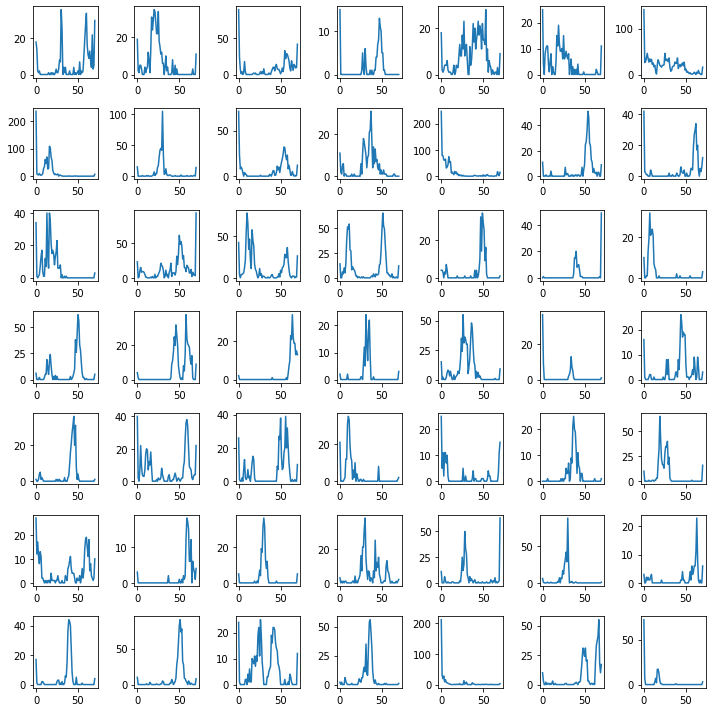

In [10]:
fig, ax = plt.subplots(7,7, figsize=(10,10))
for i in range(49):
    ax.flatten()[i].plot(
             data_preprocess.place_field_data['spike_histograms'][i])
plt.tight_layout()

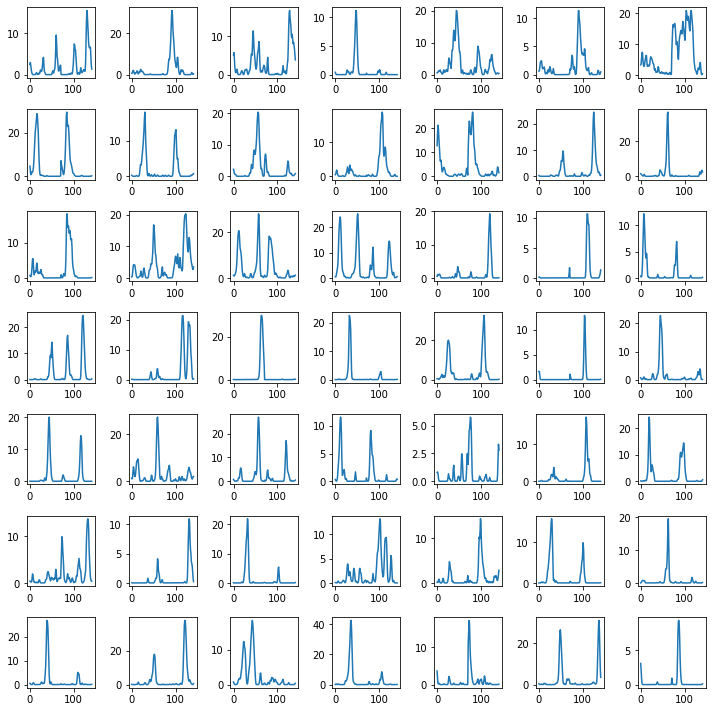

In [118]:
fig, ax = plt.subplots(7,7, figsize=(10,10))
for i in range(49):
    ax.flatten()[i].plot(
             data_preprocess.place_field_data['place_fields'][i])
plt.tight_layout()

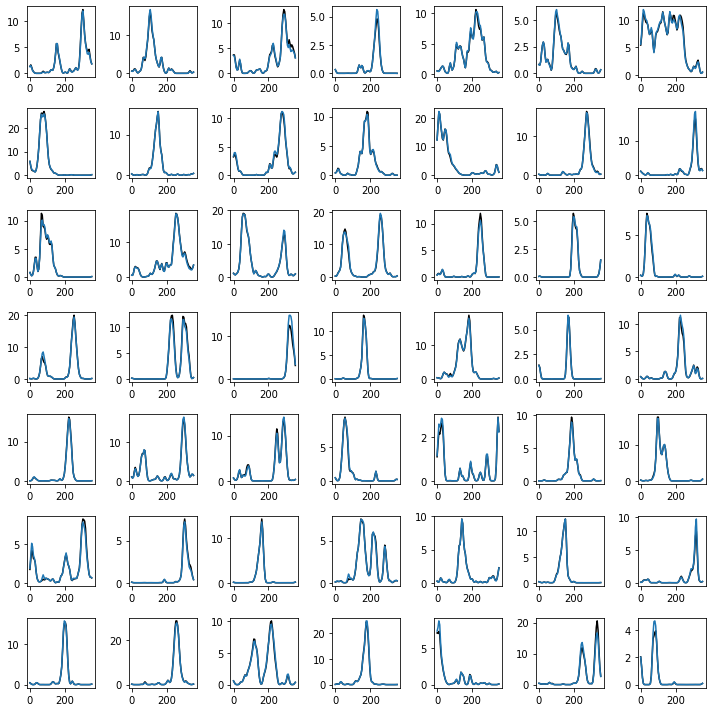

In [45]:
fig, ax = plt.subplots(7,7, figsize=(10,10))
for i in range(49):
    ax.flatten()[i].plot(data_preprocess.place_field_data['spatial_grid']['x'][:-1],
             data_preprocess.place_field_data['place_fields'][i], c='k')
    ax.flatten()[i].plot(data_preprocess.place_field_data['spatial_grid']['x'][:-1],
             place_field_rd[i]/2)
    #ax.flatten()[i].plot(data_preprocess.place_field_data['spatial_grid']['x'][:-1],
    #         data_preprocess_rd.place_field_data['place_fields'][:,:71][i])    
    #ax.flatten()[i].plot(data_preprocess.place_field_data['spatial_grid']['x'][:-1],
    #         data_preprocess_rd.place_field_data['place_fields'][:,71:][i]) 
    
plt.tight_layout()

In [61]:
spike_histograms = data_preprocess.place_field_data['spike_histograms']
place_fields = data_preprocess.place_field_data['place_fields']

np.savetxt("spike_histograms.txt", spike_histograms)
np.savetxt("place_fields.txt", place_fields)

In [33]:
data_preprocess.place_field_data['place_fields'].shape

(53, 71)

In [37]:
place_field_rd = data_preprocess_rd.place_field_data['place_fields'][:,:71] + data_preprocess_rd.place_field_data['place_fields'][:,71:]
place_field_rd.shape

(53, 71)

## Ripple preprocessing

In [10]:
time_window_ms=15

In [13]:
ripple_params = Ripple_Preprocessing_Parameters(
            data_preprocess.params, time_window_ms=time_window_ms)

In [14]:
spikemat_data = Ripple_Preprocessing(data_preprocess, ripple_params)
# firing rate scaling k, scale

Getting ripple spikemats
[35 14 42 ... 14 41 41]
[35 14 42 ... 14 41 41]
3.8501980266233864 0.6459876920987213


In [20]:
spikemat_data.ripple_info.keys()

dict_keys(['spikemats_fullripple', 'spikemats_popburst', 'popburst_times_s', 'avg_spikes_per_s_smoothed', 'popburst_mean_firing_rate_array', 'popburst_mean_firing_rate_matrix', 'firing_rate_scaling'])

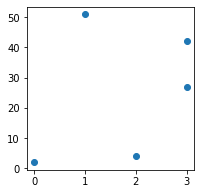

In [21]:
rip = 6
plt.figure(figsize=(3,3))
plt.plot(np.where(spikemat_data.ripple_info["spikemats_fullripple"][rip]==1)[0], 
         np.where(spikemat_data.ripple_info["spikemats_fullripple"][rip]==1)[1], 'o')

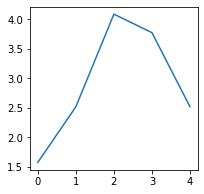

In [18]:
plt.figure(figsize=(3,3))
plt.plot(spikemat_data.ripple_info["avg_spikes_per_s_smoothed"][rip])

In [15]:
RESULTS_PATH = "/home/katharina/Documents/Studium/MIT/project/1D/results"
filename = RESULTS_PATH+'/ripples/Data4Pset__'+str(bin_size_cm)+'cm_'+str(time_window_ms)+'ms_poisson.obj'

serialized = pickle.dumps(spikemat_data)
with open(filename, "wb") as file_object:
    file_object.write(serialized)

In [130]:
spikemat_data.params.n_bins_x

71

In [18]:
structure_analysis_input = Structure_Analysis_Input.reformat_ripple_data(
            spikemat_data, Poisson(), running_direction=False)

In [19]:
structure_analysis_input.running_direction

False

In [20]:
RESULTS_PATH = "/home/katharina/Documents/Studium/MIT/project/1D/results"
filename = RESULTS_PATH+'/structure_analysis_input/Data4Pset_ripples_'+str(bin_size_cm)+'cm_'+str(time_window_ms)+'ms_poisson.obj'
# filename = RESULTS_PATH+'/structure_analysis_input/RD_Data4Pset_ripples_'+str(bin_size_cm)+'cm_'+str(time_window_ms)+'ms_poisson.obj'
serialized = pickle.dumps(structure_analysis_input)
with open(filename, "wb") as file_object:
    file_object.write(serialized)

## run snippet preprocessing

In [100]:
run_snippet_params = Run_Snippet_Preprocessing_Parameters(
            data_preprocess.params, time_window_ms=time_window_ms
        )

In [101]:
spikemat_data_run_snippet = Run_Snippet_Preprocessing(
            data_preprocess, spikemat_data, run_snippet_params)

Getting spikemats


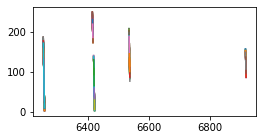

In [102]:
plt.figure(figsize=(4,2))
for i in range(len(spikemat_data_run_snippet.run_info['run_times_s'])):
    time = spikemat_data_run_snippet.run_info['run_times_s'][i]
    plt.plot(np.linspace(time[0], time[1], spikemat_data_run_snippet.run_info['true_trajectories_cm'][i].shape[0]), spikemat_data_run_snippet.run_info['true_trajectories_cm'][i])

In [19]:
structure_analysis_input_run = Structure_Analysis_Input.reformat_run_snippet_data(
            spikemat_data_run_snippet, Poisson())

In [20]:
RESULTS_PATH = "/home/katharina/Documents/Studium/MIT/project/1D/results"
filename = RESULTS_PATH+'/structure_analysis_input/Data4Pset_runsnippets_'+str(bin_size_cm)+'cm_'+str(time_window_ms)+'ms_poisson.obj'
#filename = RESULTS_PATH+'/structure_analysis_input/Data4Pset_full_run_'+str(bin_size_cm)+'cm_200ms_poisson.obj'

serialized = pickle.dumps(structure_analysis_input_run)
with open(filename, "wb") as file_object:
    file_object.write(serialized)

## Selected Data

In [21]:
bin_size_cm=5
time_window_ms=200

In [23]:
selected_data_params = Selected_Data_Preprocessing_Parameters(
            data_preprocess.params, time_window_ms=time_window_ms
        )

In [30]:
selected_data_params.time_window_ms

200

In [31]:
#spikemat_data_full.run_info['run_times_s']

In [25]:
full_data_times = np.array([[6200, 7047]])
spikemat_data_full = Selected_Data_Preprocessing(
            data_preprocess, selected_data_params, full_data_times)

Getting spikemats


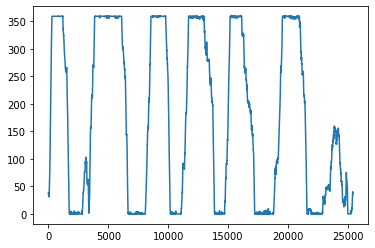

In [19]:
time = spikemat_data_full.run_info['run_times_s'][0]
plt.plot(spikemat_data_full.run_info['true_trajectories_cm'][0])

In [36]:
spikemat_data_full.run_info['spikemats'][0]

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  5, ...,  0,  0,  0],
       [ 0,  0, 11, ...,  0,  0,  1]])

In [19]:
np.savetxt("spikemat.txt", spikemat_data_full.run_info['spikemats'][0])

In [26]:
structure_analysis_input_full = Structure_Analysis_Input.reformat_selected_data(
            spikemat_data_full, Poisson(), running_direction=False)

In [27]:
RESULTS_PATH = "/home/katharina/Documents/Studium/MIT/project/1D/results"
filename = RESULTS_PATH+'/structure_analysis_input/RD_Data4Pset_fulldata_'+str(bin_size_cm)+'cm_'+str(time_window_ms)+'ms_poisson.obj'
#filename = RESULTS_PATH+'/structure_analysis_input/Data4Pset_full_run_'+str(bin_size_cm)+'cm_200ms_poisson.obj'

serialized = pickle.dumps(structure_analysis_input_full)
with open(filename, "wb") as file_object:
    file_object.write(serialized)

In [32]:
run_times = np.array(list(zip(data_preprocess.velocity_info['run_starts'], data_preprocess.velocity_info['run_ends'])))
run_times = np.array([run for run in run_times if np.diff(run) > 0.7 ])
spikemat_data_run = Selected_Data_Preprocessing(
            data_preprocess_rd, selected_data_params, run_times)

Getting spikemats


In [65]:
np.savetxt("runtimes.txt", run_times)

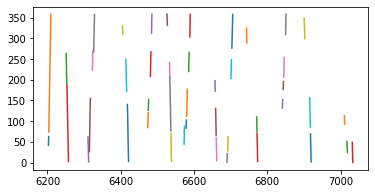

In [33]:
plt.figure(figsize=(6,3))
for i in range(len(spikemat_data_run.run_info['run_times_s'])):
    time = spikemat_data_run.run_info['run_times_s'][i]
    plt.plot(np.linspace(time[0], time[1], spikemat_data_run.run_info['true_trajectories_cm'][i].shape[0]), spikemat_data_run.run_info['true_trajectories_cm'][i])

In [43]:
spikemat_data_run.run_info['run_times_s']

array([[6202.78333333, 6203.48333333],
       [6203.81666667, 6209.38333333],
       [6251.11666667, 6253.08333333],
       [6253.25      , 6257.58333333],
       [6310.75      , 6312.55      ],
       [6314.45      , 6317.28333333],
       [6322.75      , 6323.85      ],
       [6326.15      , 6328.48333333],
       [6404.88333333, 6405.68333333],
       [6414.08333333, 6416.28333333],
       [6418.15      , 6421.48333333],
       [6473.68333333, 6474.98333333],
       [6475.28333333, 6476.25      ],
       [6481.01666667, 6482.51666667],
       [6484.08333333, 6485.21666667],
       [6526.35      , 6527.31666667],
       [6533.08333333, 6533.81666667],
       [6533.85      , 6536.91666667],
       [6536.95      , 6538.71666667],
       [6572.88333333, 6574.01666667],
       [6578.55      , 6579.28333333],
       [6579.98333333, 6581.65      ],
       [6585.38333333, 6586.75      ],
       [6588.51666667, 6589.81666667],
       [6657.25      , 6657.95      ],
       [6658.95      , 66

In [25]:
RESULTS_PATH = "/home/katharina/Documents/Studium/MIT/project/1D/results"
filename = RESULTS_PATH+'/RD_Data4Pset_fullrun_'+str(bin_size_cm)+'cm_200ms_poisson.obj'
#filename = RESULTS_PATH+'/structure_analysis_input/Data4Pset_full_run_'+str(bin_size_cm)+'cm_200ms_poisson.obj'

serialized = pickle.dumps(spikemat_data_run)
with open(filename, "wb") as file_object:
    file_object.write(serialized)

In [34]:
structure_analysis_input_run = Structure_Analysis_Input.reformat_selected_data(
            spikemat_data_run, Poisson(), running_direction=True)

In [35]:
RESULTS_PATH = "/home/katharina/Documents/Studium/MIT/project/1D/results"
filename = RESULTS_PATH+'/structure_analysis_input/RD_Data4Pset_fullrun_'+str(bin_size_cm)+'cm_'+str(time_window_ms)+'ms_poisson.obj'
#filename = RESULTS_PATH+'/structure_analysis_input/Data4Pset_full_run_'+str(bin_size_cm)+'cm_200ms_poisson.obj'

serialized = pickle.dumps(structure_analysis_input_run)
with open(filename, "wb") as file_object:
    file_object.write(serialized)

In [66]:
full_run_times = np.array([[6200, 6209], [6240, 6258], [6292, 6328], [6403, 6420], [6472, 6484], [6526, 6537], [6570, 6586],
                 [6623, 6662], [6693, 6706], [6738, 6775], [6826, 6851], [6900, 6919], [6964, 7045]])

spikemat_data_run = Selected_Data_Preprocessing(
            data_preprocess, selected_data_params, full_run_times)

Getting spikemats


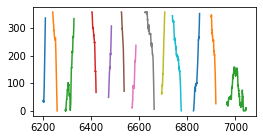

In [67]:
plt.figure(figsize=(4,2))
for i in range(len(spikemat_data_run.run_info['run_times_s'])):
    time = spikemat_data_run.run_info['run_times_s'][i]
    plt.plot(np.linspace(time[0], time[1], spikemat_data_run.run_info['true_trajectories_cm'][i].shape[0]), spikemat_data_run.run_info['true_trajectories_cm'][i])

In [48]:
structure_analysis_input_run = Structure_Analysis_Input.reformat_selected_data(
            spikemat_data_run, Poisson())

In [49]:
RESULTS_PATH = "/home/katharina/Documents/Studium/MIT/project/1D/results"
filename = RESULTS_PATH+'/structure_analysis_input/Data4Pset_fullrun_'+str(bin_size_cm)+'cm_'+str(time_window_ms)+'ms_poisson.obj'
#filename = RESULTS_PATH+'/structure_analysis_input/Data4Pset_full_run_'+str(bin_size_cm)+'cm_200ms_poisson.obj'

serialized = pickle.dumps(structure_analysis_input_run)
with open(filename, "wb") as file_object:
    file_object.write(serialized)